# Version information

In [34]:
%matplotlib notebook
from PySide2.QtWidgets import *
from datetime import date
print("Running date: ", date.today().strftime("%B %d, %Y"))
import pyleecan
print("Pyleecan version: " + pyleecan.__version__)
import SciDataTool
print("SciDataTool version: " + SciDataTool.__version__)

Running date:  June 13, 2025
Pyleecan version: 1.5.2
SciDataTool version: 2.5.0


## load a machine
Once the machine defined in the GUI it can be loaded and plot with the following commands:

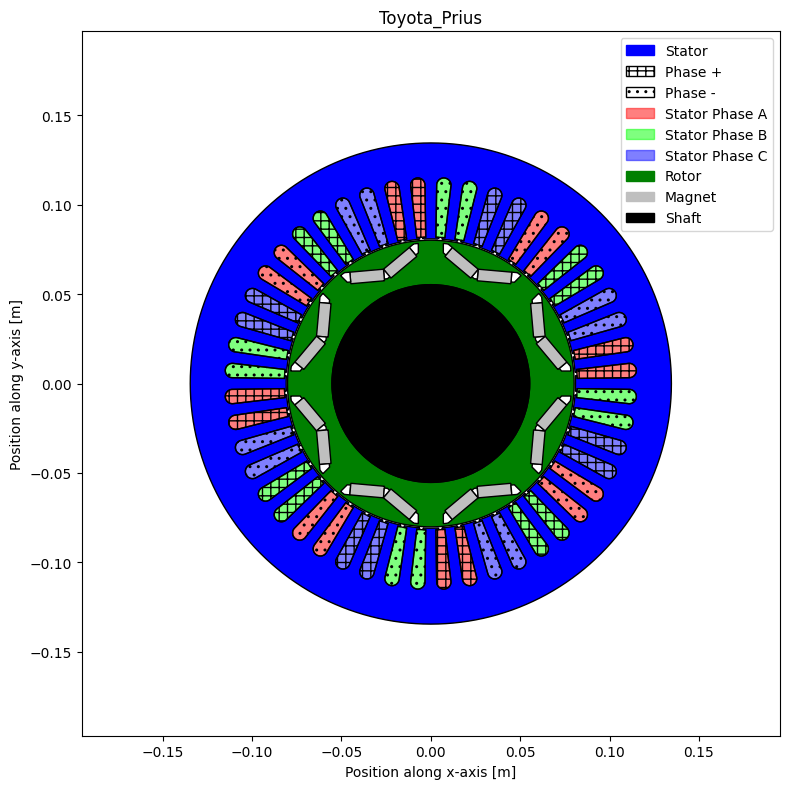

In [35]:
%matplotlib inline

# Load the machine
from os.path import join
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR

IPMSM_A = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
# In Jupyter notebook, we set is_show_fig=False to skip call to fig.show() to avoid a warning message
# All plot methods return the corresponding matplotlib figure and axis to further edit the resulting plot
fig, ax = IPMSM_A.plot(is_show_fig=False)  

In [36]:
#inspection de toyota_pruis.json
print(IPMSM_A) # Affichage d'une vue globale de la machine complète
print(IPMSM_A.stator) # Affichage des informations sur le stator 
print(IPMSM_A.rotor) # Affichage des informations sur le rotor
print(IPMSM_A.stator.winding) # Affiche les paramètres du bobinage du stator 
print(IPMSM_A.rotor.slot) #Affiche le type et dimensions des encoches du rotor


parent = None 
frame = None

shaft = parent = <class 'pyleecan.Classes.MachineIPMSM.MachineIPMSM'> object
	Lshaft = 0.1
	mat_type = parent = <class 'pyleecan.Classes.Shaft.Shaft'> object
		name = "M400-50A"
		is_isotropic = False
		elec = parent = <class 'pyleecan.Classes.Material.Material'> object
			rho = 4.6e-07
			epsr = 1
			alpha = 0
		mag = parent = <class 'pyleecan.Classes.Material.Material'> object
			mur_lin = 2500.0
			Brm20 = 0
			alpha_Br = 0
			Wlam = 0.0005
			BH_curve = parent = <class 'pyleecan.Classes.MatMagnetics.MatMagnetics'> object
				is_transpose = False
				value = 
				[[0.000e+00 0.000e+00]
 [1.000e+02 5.000e-01]
 [1.500e+02 7.000e-01]
 [1.800e+02 8.000e-01]
 [2.000e+02 9.000e-01]
 [2.500e+02 1.000e+00]
 [3.000e+02 1.050e+00]
 [3.500e+02 1.100e+00]
 [4.500e+02 1.150e+00]
 [5.500e+02 1.200e+00]
 [6.500e+02 1.225e+00]
 [7.500e+02 1.250e+00]
 [8.500e+02 1.275e+00]
 [9.500e+02 1.300e+00]
 [1.100e+03 1.325e+00]
 [1.250e+03 1.350e+00]
 [1.400e+03 1.375e+00]
 [1.550

AttributeError: 'LamHole' object has no attribute 'slot'

In [37]:
# Affichage de nombre de trous et les paramètres géométriques du premier trou
print(f"Nombre de trous dans le rotor : {len(IPMSM_A.rotor.hole)}")
hole = IPMSM_A.rotor.hole[0]
print("Type de trou :", type(hole).__name__)
print("Largeur W0 :", hole.W0)
print("Hauteur H0 :", hole.H0)
print("Nombre d'aimants dans ce trou :", hole.get_magnet_number())


Nombre de trous dans le rotor : 1
Type de trou : HoleM50
Largeur W0 : 0.042
Hauteur H0 : 0.01096


AttributeError: 'HoleM50' object has no attribute 'get_magnet_number'

In [38]:
#les aimants
magnet = hole.magnet_0
print("Type d’aimant :", magnet.mat_type.name)
print("Aimant Brm20 :", magnet.mat_type.mag.Brm20, "T")

Type d’aimant : MagnetPrius
Aimant Brm20 : 1.24 T


In [39]:
#les paramètres géométriques
hole = IPMSM_A.rotor.hole[0]
print("W0 =", hole.W0)
print("H0 =", hole.H0)
print("H1 =", hole.H1)
print("W3 =", hole.W3)
...

W0 = 0.042
H0 = 0.01096
H1 = 0.0015
W3 = 0.014


Ellipsis

## Defining Machine in scripting mode 
Pyleecan also enables to define the machine in scripting mode, using different classes. Each class is defined from a csv file in the folder _pyleecan/Generator/ClasseRef_ and the documentation of every class is available on the dedicated [webpage](https://www.pyleecan.org/pyleecan.Classes.html).
The following image shows the machine classes organization : 

![](https://www.pyleecan.org/_static/machine_classes_UML.png)

Every rotor and stator can be created with the **Lamination** class or one of its daughters.  

![](https://www.pyleecan.org/_static/lamination_classes_UML.png)

The scripting enables to define some complex and exotic machine that can't be defined in the GUI such as this one:

modification ========= 

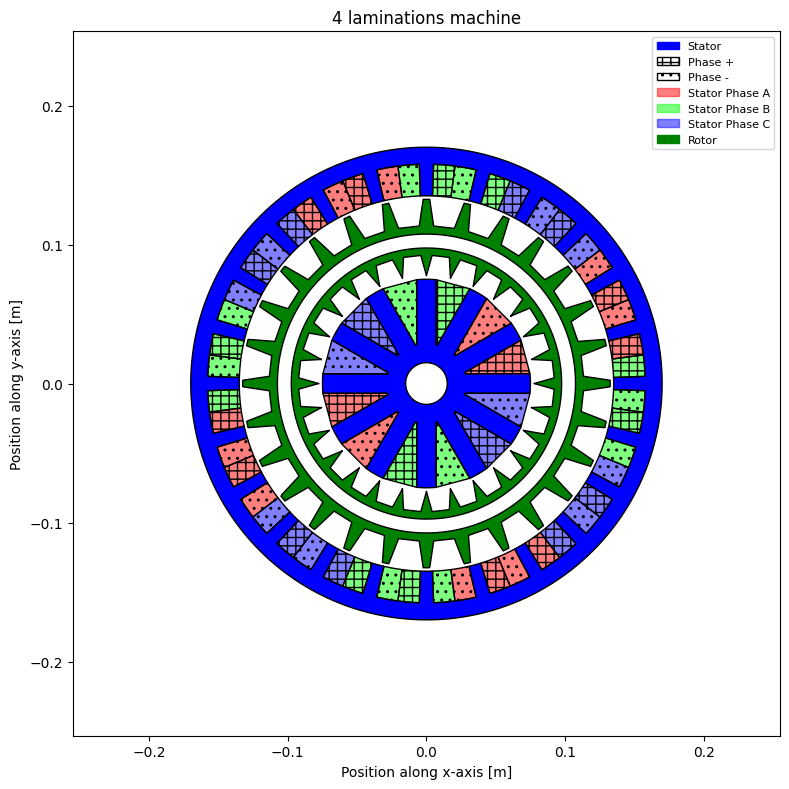

In [40]:
from pyleecan.Classes.MachineUD import MachineUD
from pyleecan.Classes.LamSlotWind import LamSlotWind
from pyleecan.Classes.LamSlot import LamSlot
from pyleecan.Classes.Winding import Winding
from pyleecan.Classes.SlotW10 import SlotW10
from pyleecan.Classes.SlotW22 import SlotW22
from numpy import pi

machine = MachineUD(name="4 laminations machine", shaft=None)

# Main geometry parameter
Rext = 170e-3  # Exterior radius of outter lamination
W1 = 35e-3  # on passe de Passe de 30 mm → 35 mm
A1 = 2.5e-3  # Width of the first airgap
W2 = 25e-3    # on passe de 20 mm → 25 mm
A2 = 10e-3
W3 = 20e-3
A3 = 2.5e-3
W4 = 60e-3

# Outer stator
lam1 = LamSlotWind(Rext=Rext, Rint=Rext - W1, is_internal=False, is_stator=True)
lam1.slot = SlotW22(
    Zs=24, W0=2 * pi / 24 * 0.75, W2=2 * pi / 24 * 0.75, H0=0, H2=W1 * 0.65
)
lam1.winding = Winding(qs=3, p=2, Nlayer=2)
# External Rotor
lam2 = LamSlot(
    Rext=lam1.Rint - A1, Rint=lam1.Rint - A1 - W2, is_internal=True, is_stator=False
)
lam2.slot = SlotW10(Zs=28, W0=25e-3, W1=25e-3, W2=15e-3, H0=0, H1=0, H2=W2 * 0.75)
# Internal Rotor
lam3 = LamSlot(
    Rext=lam2.Rint - A2,
    Rint=lam2.Rint - A2 - W3,
    is_internal=False,
    is_stator=False,
)
lam3.slot = SlotW10(
    Zs=28, W0=17.5e-3, W1=17.5e-3, W2=12.5e-3, H0=0, H1=0, H2=W3 * 0.75
)
# Inner stator
lam4 = LamSlotWind(
    Rext=lam3.Rint - A3, Rint=lam3.Rint - A3 - W4, is_internal=True, is_stator=True
)
lam4.slot = SlotW10(Zs=12, W0=25e-3, W1=25e-3, W2=1e-3, H0=0, H1=0, H2=W4 * 0.75)
lam4.winding = Winding(qs=3, p=2, Nlayer=1)
# Machine definition
machine.lam_list = [lam1, lam2, lam3, lam4]

# Plot, check and save
fig, ax = machine.plot(is_show_fig=False)

## Stator definition
To define the stator, we initialize a [**LamSlotWind**](http://pyleecan.org/pyleecan.Classes.LamSlotWind.html) object (a **Lam**ination with **Slot** containing **Wind**ing) with the different parameters. In pyleecan, all the parameters must be set in SI units.

In [41]:
from pyleecan.Classes.LamSlotWind import LamSlotWind
mm = 1e-3  # Millimeter


# Lamination setup
stator = LamSlotWind(
    Rint=135.0 * mm, # internal radius [m]  170 - 35
    Rext=170.0 * mm,  # Rayon externe défini pour la machine 
    L1=83.82 * mm, # Lamination stack active length [m] without radial ventilation airducts 
                # but including insulation layers between lamination sheets
    Nrvd=0, # Number of radial air ventilation duct
    Kf1=0.95, # Lamination stacking / packing factor
    is_internal=False,
    is_stator=True, 
)

Then we add 48 slots using [**SlotW11**](http://pyleecan.org/pyleecan.Classes.SlotW11.html) which is one of the 25 Slot classes. All the schematics are available in the GUI, on [Github](https://github.com/Eomys/pyleecan/tree/master/pyleecan/GUI/Resources/images/MachineSetup/WSlot) or with the "plot_schematics" method: 

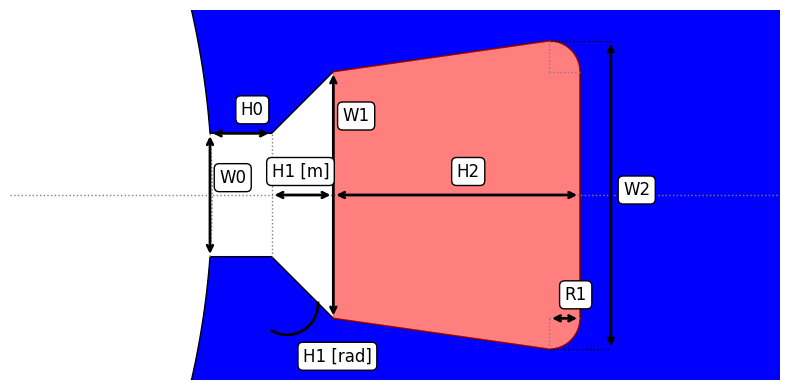

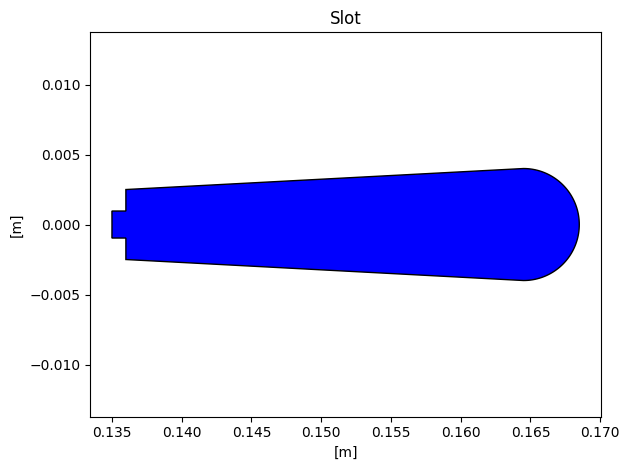

In [42]:
from pyleecan.Classes.SlotW11 import SlotW11

# Slot setup
stator.slot = SlotW11(
    Zs=48,            # Slot number
    H0=1.0 * mm,      # Slot isthmus height
    H1=0,             # Intermediate height
    H2=32.5 * mm,     # Slot height below wedge (ajusté pour marge)
    W0=1.93 * mm,     # Slot isthmus width
    W1=5 * mm,        # Slot top width
    W2=8 * mm,        # Slot bottom width
    R1=4 * mm         # Slot bottom radius
)
fig, ax = stator.slot.plot_schematics(is_default=True, is_show_fig=False)
fig, ax = stator.slot.plot(is_show_fig=False)


As for the slot, we can define the winding and its conductor with [**Winding**](http://pyleecan.org/pyleecan.Classes.Winding.html) and [**CondType11**](http://pyleecan.org/pyleecan.Classes.CondType11.html) (CondType11 is Form wound / rectangular wire). The conventions for winding are further explained on [pyleecan website](https://pyleecan.org/winding.convention.html)

Nwppc_rad=Nwppc_tan=1


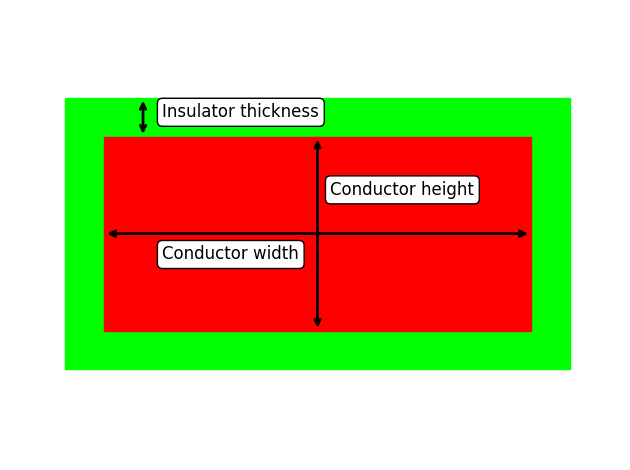

In [43]:
from pyleecan.Classes.Winding import Winding
from pyleecan.Classes.CondType11 import CondType11
# Winding setup
stator.winding = Winding(
    qs=3,
    p=4,
    Nlayer=1,
    coil_pitch=0,
    Lewout=0.01,        # Ajout longueur de sortie réaliste
    Ntcoil=9,
    Npcp=1,
    Nslot_shift_wind=0,
    is_reverse_wind=False
)

# Conductor setup
stator.winding.conductor = CondType11(
    Nwppc_tan=1,
    Nwppc_rad=1,
    Wwire=0.000912,
    Hwire=0.002,
    Wins_wire=0.1e-3,   # Plus réaliste
    type_winding_shape=0
)
print("Nwppc_rad=Nwppc_tan=1")
fig, ax = stator.winding.conductor.plot_schematics(is_default=True, is_single=True, is_show_fig=False)

Another schematics is available with more than one strands:

More than one strands


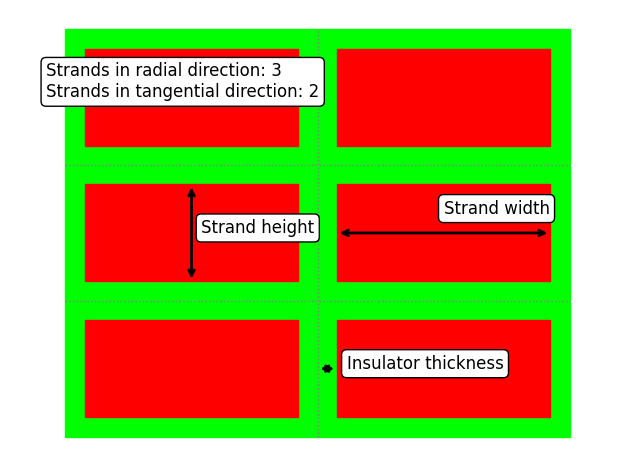

In [44]:
print("More than one strands") # Visualiser la géométrie interne du bobinage
fig, ax = stator.winding.conductor.plot_schematics(is_default=True, is_single=False, is_show_fig=False)

Stranded coil are also available by using a [**CondType12**](http://pyleecan.org/pyleecan.Classes.CondType12.html) object.

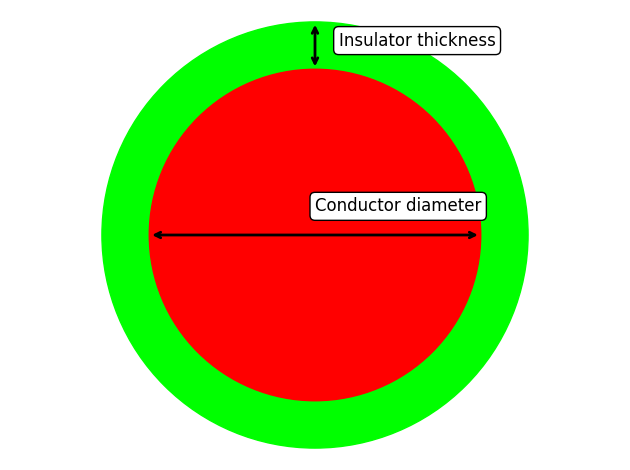

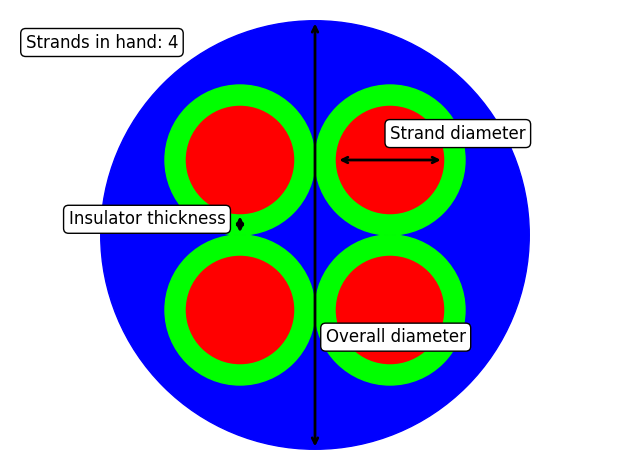

In [45]:
from pyleecan.Classes.CondType12 import CondType12

cond = CondType12()
fig, ax = cond.plot_schematics(is_default=True, is_single=True, is_show_fig=False)
fig, ax = cond.plot_schematics(is_default=True, is_single=False, is_show_fig=False)

The winding pattern is defined with the star of slot method (thanks to [swat-em](https://swat-em.readthedocs.io/en/latest/) package) according to Zs, qs, p, Nlayer and coil_pitch. 

In [46]:
stator.winding.comp_connection_mat()  # Compute the winding pattern with swat-em
wind_mat = stator.winding.get_connection_mat()
# The resulting winding matrix is:
# 1 rad layer, 1 tan layer, 48 slots, 3 phases
print(wind_mat.shape)  
print(wind_mat)

(1, 1, 48, 3)
[[[[ 9.  0.  0.]
   [ 9.  0.  0.]
   [ 0.  0. -9.]
   [ 0.  0. -9.]
   [ 0.  9.  0.]
   [ 0.  9.  0.]
   [-9.  0.  0.]
   [-9.  0.  0.]
   [ 0.  0.  9.]
   [ 0.  0.  9.]
   [ 0. -9.  0.]
   [ 0. -9.  0.]
   [ 9.  0.  0.]
   [ 9.  0.  0.]
   [ 0.  0. -9.]
   [ 0.  0. -9.]
   [ 0.  9.  0.]
   [ 0.  9.  0.]
   [-9.  0.  0.]
   [-9.  0.  0.]
   [ 0.  0.  9.]
   [ 0.  0.  9.]
   [ 0. -9.  0.]
   [ 0. -9.  0.]
   [ 9.  0.  0.]
   [ 9.  0.  0.]
   [ 0.  0. -9.]
   [ 0.  0. -9.]
   [ 0.  9.  0.]
   [ 0.  9.  0.]
   [-9.  0.  0.]
   [-9.  0.  0.]
   [ 0.  0.  9.]
   [ 0.  0.  9.]
   [ 0. -9.  0.]
   [ 0. -9.  0.]
   [ 9.  0.  0.]
   [ 9.  0.  0.]
   [ 0.  0. -9.]
   [ 0.  0. -9.]
   [ 0.  9.  0.]
   [ 0.  9.  0.]
   [-9.  0.  0.]
   [-9.  0.  0.]
   [ 0.  0.  9.]
   [ 0.  0.  9.]
   [ 0. -9.  0.]
   [ 0. -9.  0.]]]]


In [47]:
#visualisation des bobinage
#stator.winding.plot_winding(is_show_fig=True)

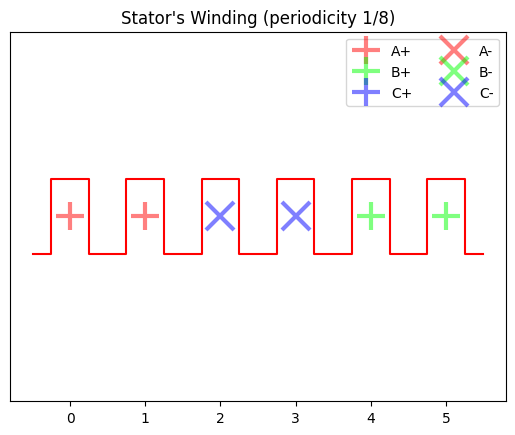

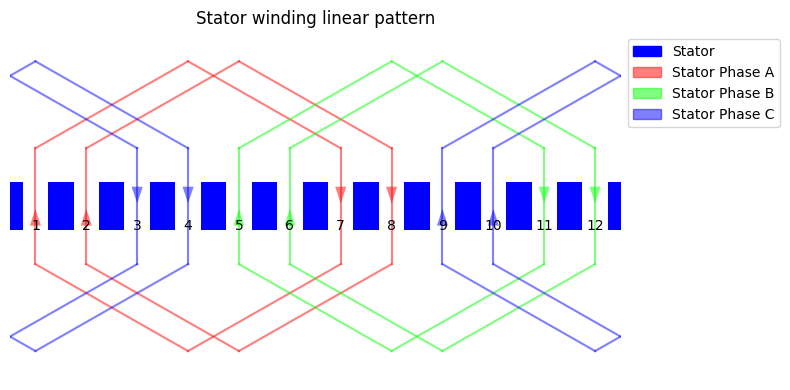

In [48]:
fig, ax = stator.plot_winding(is_show_fig=False)   # Show winding pattern smallest sym
fig, ax = stator.winding.plot_linear(is_show_fig=False)

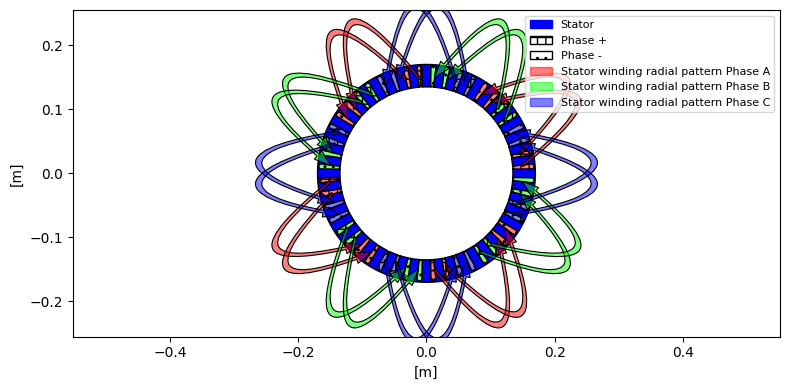

In [49]:
fig, ax = stator.plot(
                is_winding_connection=True,
                is_show_fig=False,
                is_add_sign=True,
            )

To go further with winding: 
- [**WindingUD**](http://pyleecan.org/pyleecan.Classes.WindingUD.html) enables to manually define the winding pattern by enforcing the connexion matrix with the wind_mat property. 
- [**SlotUD2**](http://pyleecan.org/pyleecan.Classes.SlotUD2.html) enables to create user-defined winding layer geometry. 

Examples can be found in the our ICEM 2020 pyblication \[2\] (corresponding code available in fig 16 & 17 in https://github.com/Eomys/pyleecan/blob/master/Tests/Plot/test_ICEM_2020.py)

![](https://pyleecan.org/_images/fig_16_WindingUD.svg)

## Rotor definition

For this example, we use the [**LamHole**](http://www.pyleecan.org/pyleecan.Classes.LamHole.html) class (a **Lam**ination with **Hole**/pockets) to define the rotor. The same object is used to define the rotor for SynRM machines by defining a Hole without magnet.

In the same way as for the stator, we start by defining the lamination:

In [50]:
from pyleecan.Classes.LamHole import LamHole

# Rotor setup
# lam1: stator externe → Rext = 170 mm, W1 = 35 mm → Rint = 135 mm
# A1 = 2.5 mm
# lam2 (external rotor) W2 = 25 mm

rotor = LamHole(
    Rext = 135.0 * mm - 2.5 * mm,                      # = 132.5 mm
    Rint = 135.0 * mm - 2.5 * mm - 25.0 * mm,          # = 107.5 mm
    is_internal=True,
    is_stator=False,
    L1 = stator.L1
)

After that, we can add holes with magnets to the rotor using the class [**HoleM50**](http://www.pyleecan.org/pyleecan.Classes.HoleM50.html): 

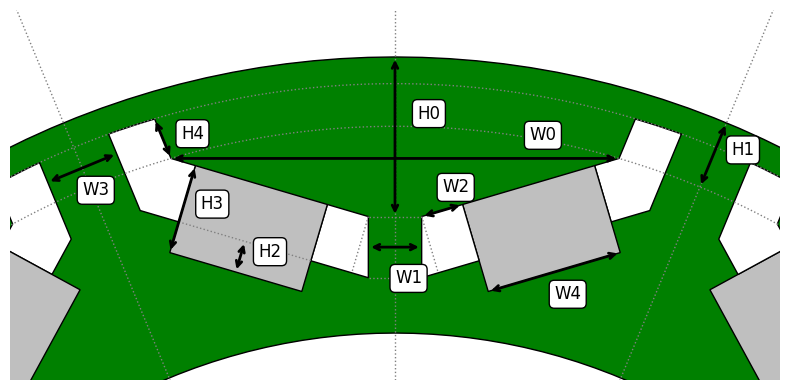

In [51]:
from pyleecan.Classes.HoleM50 import HoleM50
rotor.hole = list()
rotor.hole.append(
    HoleM50(
        Zh=8, # Number of Hole around the circumference
        W0=42.0 * mm,  # Slot opening
        W1=0, # Tooth width (at V bottom)
        W2=0, # Distance Magnet to bottom of the V
        W3=14.0 * mm, # Tooth width (at V top)
        W4=18.9 * mm, # Magnet Width
        H0=10.96 * mm, # Slot Depth
        H1=1.5 * mm, # Distance from the lamination Bore
        H2=1 * mm, # Additional depth for the magnet
        H3=6.5 * mm, # Magnet Height
        H4=0, # Slot top height
    )
)
fig, ax = rotor.hole[0].plot_schematics(is_default=True, is_show_fig=False)

The holes are defined as a list to enable to create several layers of holes and/or to combine different kinds of holes

## Create a shaft and a frame

The classes [**Shaft**](http://www.pyleecan.org/pyleecan.Classes.Shaft.html) and [**Frame**](http://www.pyleecan.org/pyleecan.Classes.Frame.html) enable to add a shaft and a frame to the machine. For this example there is no frame so the object is set as None (corresponding code is there as a exemple):

In [52]:
from pyleecan.Classes.Shaft import Shaft
from pyleecan.Classes.Frame import Frame

# Set shaft
shaft = Shaft(Drsh=rotor.Rint * 2, # Diamater of the rotor shaft [m]
                                   # used to estimate bearing diameter for friction losses
              Lshaft=1.2 # length of the rotor shaft [m] 
             )
frame = None
#frame = Frame(Rint=stator.Rext, Rext=stator.Rext+0.02, Lfra=stator.L1, mat_type=stator.mat_type)

## Set materials and magnets

Every Pyleecan object can be saved in JSON using the method `save` and can be loaded with the `load` function.
In this example, the materials *M400_50A* and *Copper1* are loaded and set in the corresponding properties.

In [53]:
# Loading Materials 
M400_50A = load(join(DATA_DIR, "Material", "M400-50A.json"))
Copper1 = load(join(DATA_DIR, "Material", "Copper1.json"))

# Set Materials
stator.mat_type = M400_50A  # Stator Lamination material
rotor.mat_type = M400_50A  # Rotor Lamination material
stator.winding.conductor.cond_mat = Copper1  # Stator winding conductor material

A material can also be defined in scripting as any other Pyleecan object. The material *Magnet_prius* is created with the classes [**Material**](http://www.pyleecan.org/pyleecan.Classes.Material.html) and [**MatMagnetics**](http://www.pyleecan.org/pyleecan.Classes.MatMagnetics.html).

In [54]:
from pyleecan.Classes.Material import Material
from pyleecan.Classes.MatMagnetics import MatMagnetics

# Defining magnets
Magnet_prius = Material(name="Magnet_prius")

# Definition of the magnetic properties of the material
Magnet_prius.mag = MatMagnetics(
    mur_lin = 1.05, # Relative magnetic permeability
    alpha_Br = -0.001, # temperature coefficient for remanent flux density /°C compared to 20°C
    Brm20 = 1.24, # magnet remanence induction at 20°C [T]
    Wlam = 0, # lamination sheet width without insulation [m] (0 == not laminated)
)

# Definition of the electric properties of the material 
Magnet_prius.elec.rho = 1.6e-06 # Resistivity at 20°C

# Definition of the structural properties of the material
Magnet_prius.struct.rho = 7500.0 # mass per unit volume [kg/m3]

The magnet materials are set with the "magnet_X" property. Pyleecan enables to define different magnetization or material for each magnets of the holes. Here both magnets are defined identical.

In [55]:
# Set magnets in the rotor hole
rotor.hole[0].magnet_0.mat_type = Magnet_prius
rotor.hole[0].magnet_1.mat_type = Magnet_prius
rotor.hole[0].magnet_0.type_magnetization = 1
rotor.hole[0].magnet_1.type_magnetization = 1

The B(H) curve of any material can be set as a two columns matrix with:

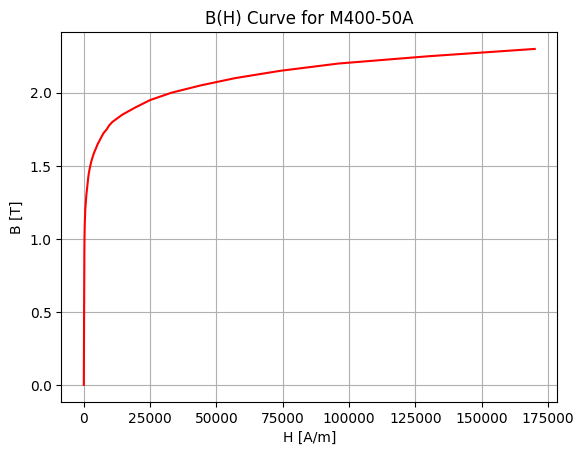

In [56]:
BH = [
    [0.0,0.0],
    [100.0,0.5],
    [150.0,0.7],
    [180.0,0.8],
    [200.0,0.9],
    [250.0,1.0],
    [300.0,1.05],
    [350.0,1.1],
    [450.0,1.15],
    [550.0,1.2],
    [650.0,1.225],
    [750.0,1.25],
    [850.0,1.275],
    [950.0,1.3],
    [1100.0,1.325],
    [1250.0,1.35],
    [1400.0,1.375],
    [1550.0,1.4],
    [1700.0,1.425],
    [1900.0,1.45],
    [2150.0,1.475],
    [2450.0,1.5],
    [2750.0,1.525],
    [3150.0,1.55],
    [3600.0,1.575],
    [4100.0,1.6],
    [4700.0,1.625],
    [5250.0,1.65],
    [6000.0,1.675],
    [6700.0,1.7],
    [7500.0,1.725],
    [8650.0,1.75],
    [9500.0,1.775],
    [10750.0,1.8],
    [14500.0,1.85],
    [19500.0,1.9],
    [25000.0,1.95],
    [33000.0,2.0],
    [44000.0,2.05],
    [57000.0,2.1],
    [74000.0,2.15],
    [96000.0,2.2],
    [130000.0,2.25],
    [170000.0,2.3]
]
M400_50A.mag.BH_curve = BH
#fig = M400_50A.mag.plot_BH(is_show_fig=False)
#je remplace pour eviter les erreures 
import matplotlib.pyplot as plt
import numpy as np

# Convertir la liste BH en tableau NumPy pour plus de facilité
BH_array = np.array(BH)

# Tracé manuel
plt.figure()
plt.plot(BH_array[:, 0], BH_array[:, 1], "r-")
plt.xlabel("H [A/m]")
plt.ylabel("B [T]")
plt.title("B(H) Curve for M400-50A")
plt.grid(True)
plt.show()


## Create, save and plot the machine
Finally, the Machine object can be created with [**MachineIPMSM**](http://www.pyleecan.org/pyleecan.Classes.MachineIPMSM.html) object and saved using the `save` method.

[19:51:17] Saving MachineIPMSM to file 'IPMSM_Toyota_Prius_2004.json'.
Saving MachineIPMSM to file 'IPMSM_Toyota_Prius_2004.json'.


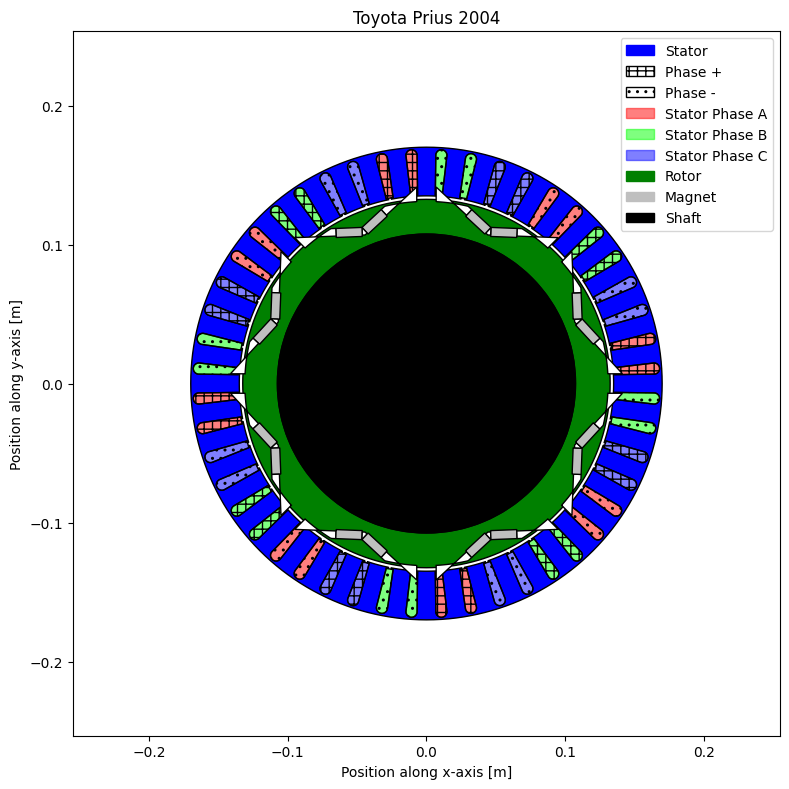

In [57]:
from pyleecan.Classes.MachineIPMSM import MachineIPMSM

IPMSM_Prius_2004 = MachineIPMSM(
    name="Toyota Prius 2004", 
    stator=stator, 
    rotor=rotor, 
    shaft=shaft, 
    frame=frame  # None
)
IPMSM_Prius_2004.save('IPMSM_Toyota_Prius_2004.json')

fig, ax = IPMSM_Prius_2004.plot(is_show_fig=False)

## Ventilation duct
To go further Pyleecan also handles ventilation duct thanks to the following classes :  
- [**VentilationCirc**](http://www.pyleecan.org/pyleecan.Classes.VentilationCirc.html)  
- [**VentilationPolar**](http://www.pyleecan.org/pyleecan.Classes.VentilationPolar.html)  
- [**VentilationTrap**](http://www.pyleecan.org/pyleecan.Classes.VentilationTrap.html)  

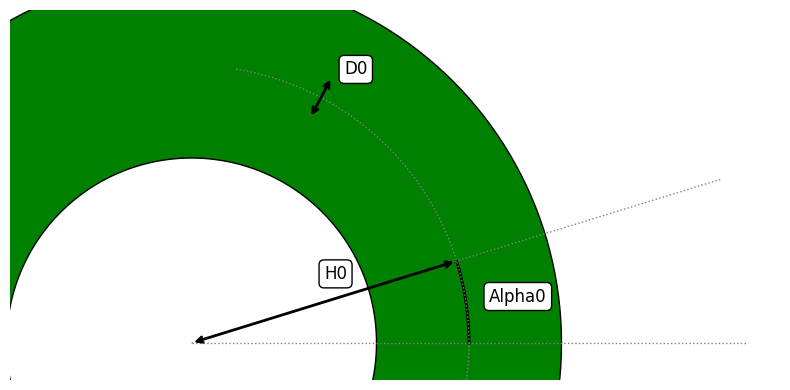

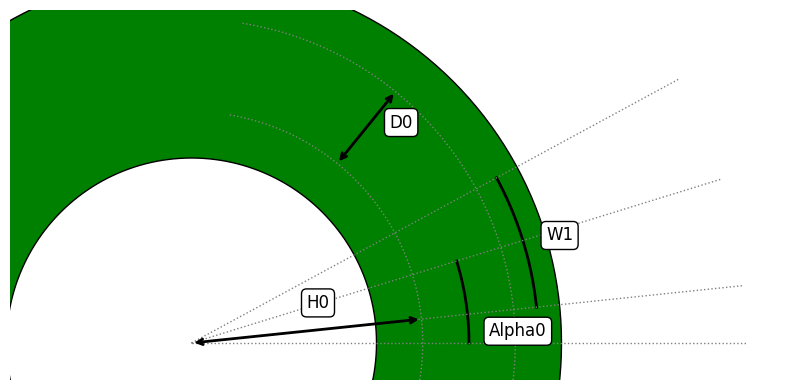

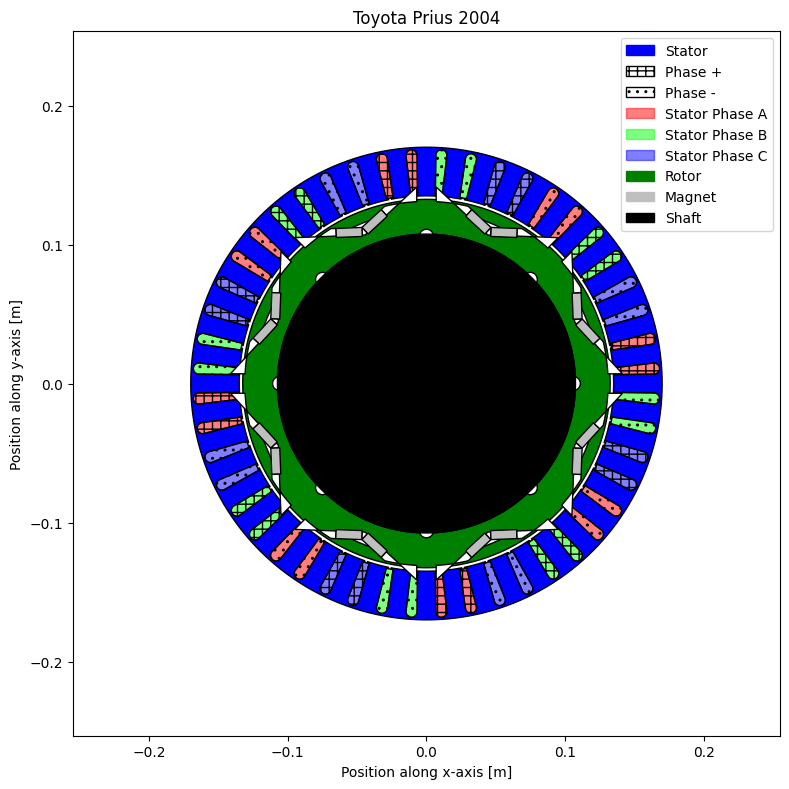

In [58]:
from pyleecan.Classes.VentilationCirc import VentilationCirc
from pyleecan.Classes.VentilationPolar import VentilationPolar

IPMSM_Prius_2004.rotor.axial_vent = list()
IPMSM_Prius_2004.rotor.axial_vent.append(VentilationCirc(Zh=8, Alpha0=0, D0=10e-3, H0=IPMSM_Prius_2004.rotor.Rext*0.8))
IPMSM_Prius_2004.rotor.axial_vent.append(VentilationPolar(Zh=8, Alpha0=pi/8, W1=pi/20, D0=5e-3, H0=IPMSM_Prius_2004.rotor.Rext*0.9))
fig, ax = IPMSM_Prius_2004.rotor.axial_vent[0].plot_schematics(is_default=True, is_show_fig=False)
fig, ax = IPMSM_Prius_2004.rotor.axial_vent[1].plot_schematics(is_default=True, is_show_fig=False)
fig, ax = IPMSM_Prius_2004.plot(is_show_fig=False)

## Notches
Notches can be added both on rotor and stator and on bore and yoke side. A notch is build with a Slot object which means that the complete Slot library of pyleecan is available for notching without extra work.
Notches can be placed one by one (Zs=1) or evenly distributed (Zs>1): 

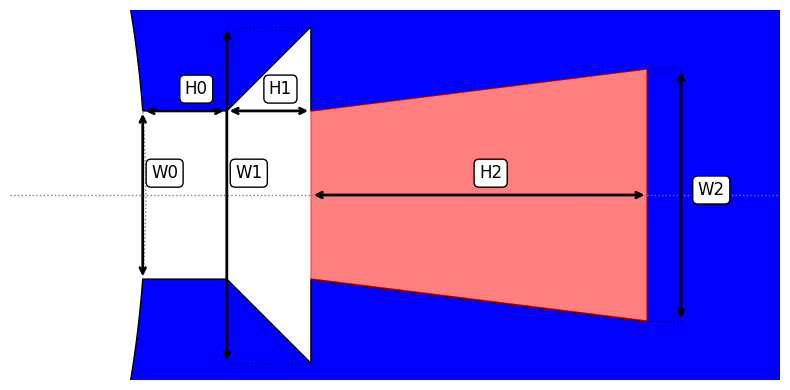

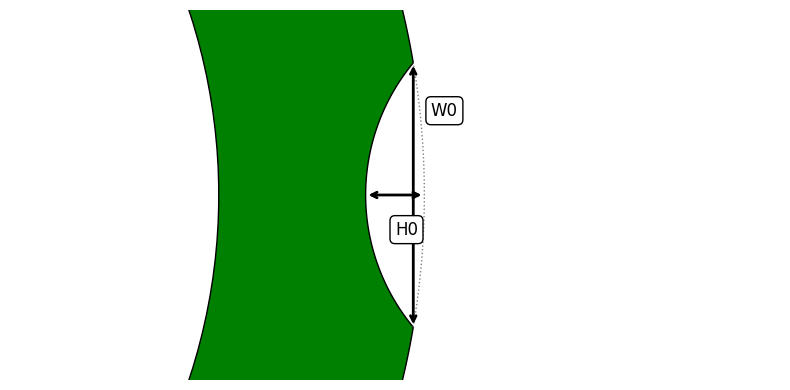

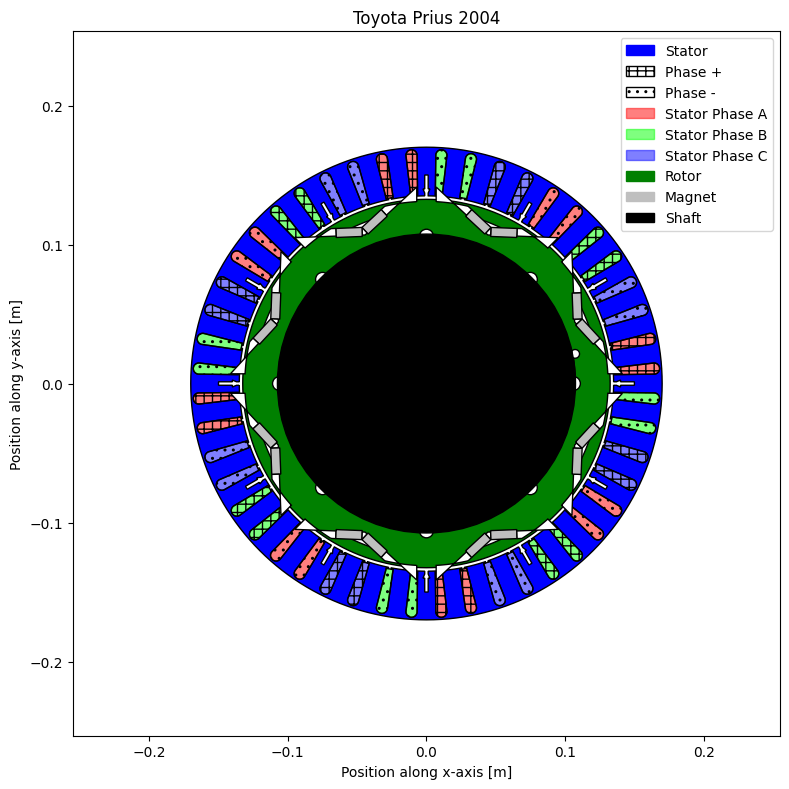

In [59]:
from pyleecan.Classes.NotchEvenDist import NotchEvenDist
from pyleecan.Classes.SlotCirc import SlotCirc

slot_s = SlotW10(Zs=12, W0=2.5e-3, W1=5e-3, W2=2.5e-3, H0=2e-3, H1=3e-3, H2=10e-3)
notch_s = NotchEvenDist(notch_shape=slot_s, alpha=0)
fig, ax = slot_s.plot_schematics(is_default=True, is_show_fig=False)

slot_r = SlotCirc(Zs=1, W0=5e-3, H0=5e-3, is_bore=False)  # Single Notch on the rotor yoke
notch_r = NotchEvenDist(notch_shape=slot_r, alpha=pi/16)  # Only one at pi/16
fig, ax = slot_r.plot_schematics(is_default=True, is_show_fig=False)

IPMSM_Prius_2004.stator.notch = [notch_s]
IPMSM_Prius_2004.rotor.notch = [notch_r]
fig, ax = IPMSM_Prius_2004.plot(is_show_fig=False)

## Bore shape
Uneven bore or yoke shape can also be added to any Lamination with:

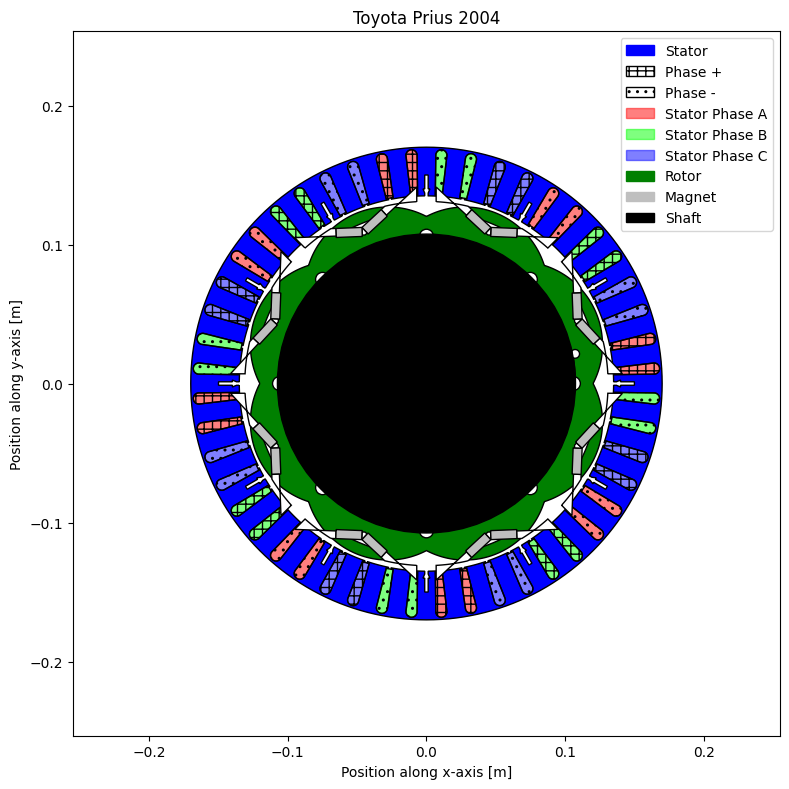

In [60]:
from pyleecan.Classes.BoreFlower import BoreFlower

rotor.bore = BoreFlower(N=8, Rarc=0.06, alpha=pi / 8)
fig, ax = IPMSM_Prius_2004.plot(is_show_fig=False)

[1] Z. Yang, M. Krishnamurthy and I. P. Brown, "Electromagnetic and vibrational characteristic of IPM over full torque-speed range", *2013 International Electric Machines & Drives Conference*, Chicago, IL, 2013, pp. 295-302.

[2] P. Bonneel, J. Le Besnerais, E. Devillers, C. Marinel, and R. Pile, “Design Optimization of Innovative Electrical Machines Topologies Based on Pyleecan Opensource Object-Oriented Software,” in 24th International Conference on Electrical Machines (ICEM), 2020.

In [33]:
import matplotlib.pyplot as plt
plt.close('all')
